In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("h1n1_vaccine_prediction.csv")

In [5]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [6]:
df.shape

(26707, 34)

## Pre-Processing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [8]:
null=df.isna().sum()/len(df)*100
null

unique_id                     0.000000
h1n1_worry                    0.344479
h1n1_awareness                0.434343
antiviral_medication          0.265848
contact_avoidance             0.778822
bought_face_mask              0.071142
wash_hands_frequently         0.157262
avoid_large_gatherings        0.325757
reduced_outside_home_cont     0.307036
avoid_touch_face              0.479275
dr_recc_h1n1_vacc             8.087767
dr_recc_seasonal_vacc         8.087767
chronic_medic_condition       3.635751
cont_child_undr_6_mnths       3.070356
is_health_worker              3.010447
has_health_insur             45.957989
is_h1n1_vacc_effective        1.464036
is_h1n1_risky                 1.452803
sick_from_h1n1_vacc           1.479013
is_seas_vacc_effective        1.729884
is_seas_risky                 1.924589
sick_from_seas_vacc           2.010709
age_bracket                   0.000000
qualification                 5.268282
race                          0.000000
sex                      

In [9]:
null_40=null[null>40].keys()
null_40

Index(['has_health_insur'], dtype='object')

In [10]:
null_4_40=null[(null<40)&(null>4)].keys()
null_4_40

Index(['dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'qualification',
       'income_level', 'marital_status', 'housing_status', 'employment'],
      dtype='object')

In [11]:
null_4=null[(null<4)&(null>0)].keys()
null_4

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children'],
      dtype='object')

In [12]:
# dropping columns whose null values are greater than 40.
df.drop(null_40,axis=1,inplace=True)

In [13]:
# filling null values greater than 4 and less than 40.
for i in null_4_40:
    if df[i].dtypes=="float64" or df[i].dtypes=="int64":
        df[i]=df[i].fillna(df[i].median())
    elif df[i].dtypes=="object":
        df[i]=df[i].fillna(df[i].mode()[0])
    

In [14]:
# dropping rows whose null values is less than 4.
for i in null_4:
    df.dropna(inplace=True)

In [15]:
null=df.isna().sum()/len(df)*100
null

unique_id                    0.0
h1n1_worry                   0.0
h1n1_awareness               0.0
antiviral_medication         0.0
contact_avoidance            0.0
bought_face_mask             0.0
wash_hands_frequently        0.0
avoid_large_gatherings       0.0
reduced_outside_home_cont    0.0
avoid_touch_face             0.0
dr_recc_h1n1_vacc            0.0
dr_recc_seasonal_vacc        0.0
chronic_medic_condition      0.0
cont_child_undr_6_mnths      0.0
is_health_worker             0.0
is_h1n1_vacc_effective       0.0
is_h1n1_risky                0.0
sick_from_h1n1_vacc          0.0
is_seas_vacc_effective       0.0
is_seas_risky                0.0
sick_from_seas_vacc          0.0
age_bracket                  0.0
qualification                0.0
race                         0.0
sex                          0.0
income_level                 0.0
marital_status               0.0
housing_status               0.0
employment                   0.0
census_msa                   0.0
no_of_adul

In [16]:
cat_cols=df.select_dtypes(include="O").columns
cat_cols

Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype='object')

In [17]:
for i in cat_cols:
    print(i,df[i].unique())

age_bracket ['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
qualification ['< 12 Years' '12 Years' 'College Graduate' 'Some College']
race ['White' 'Black' 'Other or Multiple' 'Hispanic']
sex ['Female' 'Male']
income_level ['Below Poverty' '<= $75,000, Above Poverty' '> $75,000']
marital_status ['Not Married' 'Married']
housing_status ['Own' 'Rent']
employment ['Not in Labor Force' 'Employed' 'Unemployed']
census_msa ['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


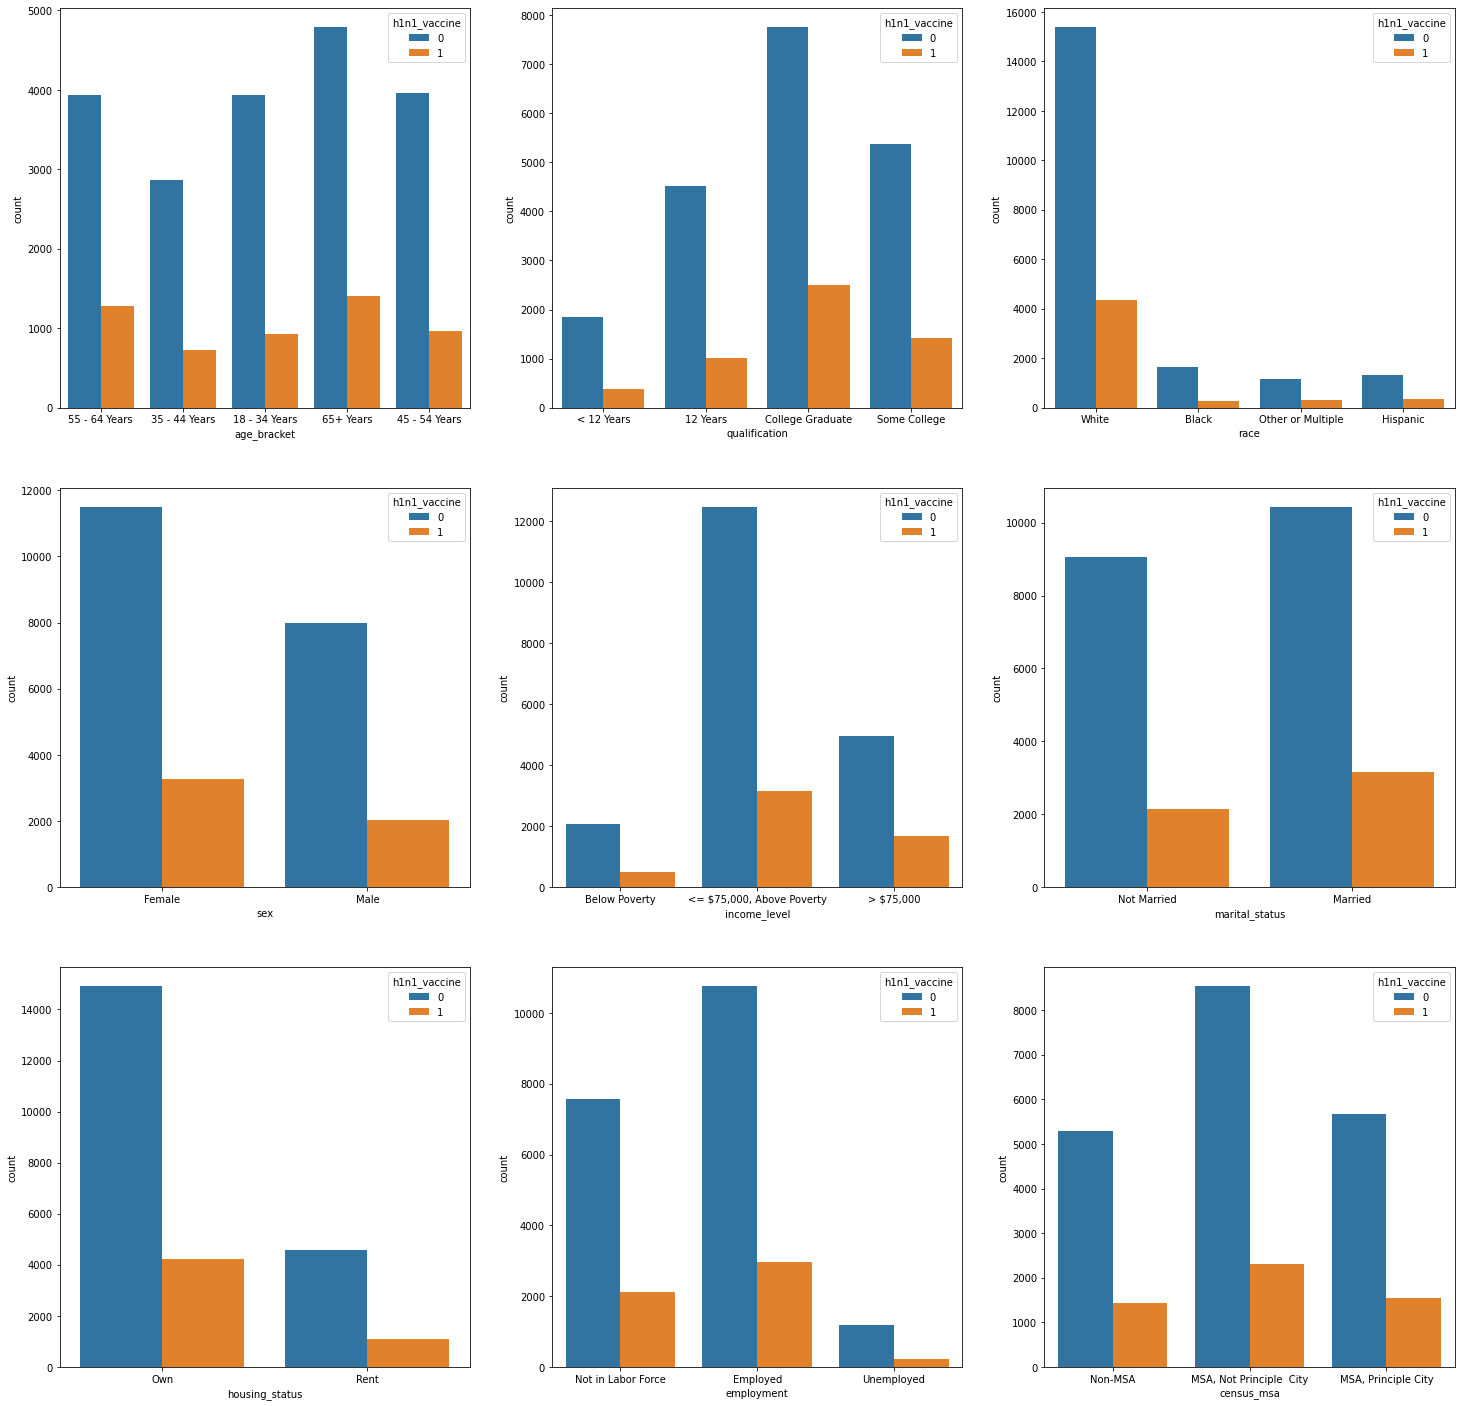

In [18]:
plt.figure(figsize=(25,25))
count=1
for i in cat_cols:
  plt.subplot(3,3,count)
  sns.countplot(data=df,x=i,hue="h1n1_vaccine")
  count+=1
plt.show()

## Encoding:

In [19]:
from sklearn import preprocessing

In [20]:
le=preprocessing.LabelEncoder()

In [21]:
for i in cat_cols:
    df[i]=le.fit_transform(df[i])

In [22]:
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3,0,2,1,0,1,2,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3,1,2,1,1,0,0,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,1,0,0,0,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3,0,2,1,1,1,1,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,0,0,0,0,0,0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,3,0,1,1,1,1,1,3.0,0.0,0
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3,0,0,1,0,1,2,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,3,1,0,1,1,0,1,1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,3,0,0,1,0,0,0,0.0,0.0,0


## Logistic Regression:

In [23]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [26]:
X_train.shape

(19842, 32)

In [27]:
X_test.shape

(4961, 32)

In [28]:
y_train.shape

(19842,)

In [29]:
y_test.shape

(4961,)

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc=StandardScaler()

In [32]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr=LogisticRegression()

In [35]:
lr.fit(X_train,y_train)

LogisticRegression()

In [36]:
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

In [37]:
y_pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score

In [41]:
print("Train accuracy")
print(accuracy_score(y_train,y_pred_train))
print("Test Accuracy")
print(accuracy_score(y_test,y_pred_test))

Train accuracy
0.8354500554379599
Test Accuracy
0.8393469058657529


In [43]:
# checking cross val score
from sklearn.model_selection import cross_val_score
lr_score=cross_val_score(lr,X,y,scoring="accuracy",cv=5)
mean_lr_score=np.mean(lr_score)
mean_lr_score

0.8097414510602052

In [44]:
from sklearn.metrics import classification_report,recall_score,precision_score,f1_score,roc_auc_score

In [45]:
print("train data")
print(classification_report(y_train,y_pred_train))
print("test data")
print(classification_report(y_test,y_pred_test))

train data
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     15567
           1       0.69      0.43      0.53      4275

    accuracy                           0.84     19842
   macro avg       0.77      0.69      0.72     19842
weighted avg       0.82      0.84      0.82     19842

test data
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      3926
           1       0.68      0.43      0.53      1035

    accuracy                           0.84      4961
   macro avg       0.77      0.69      0.72      4961
weighted avg       0.83      0.84      0.83      4961



In [47]:
y_train_proba=lr.predict_proba(X_train)[:,1]
y_train_proba

array([0.0777411 , 0.04294612, 0.10980367, ..., 0.16767704, 0.15992138,
       0.01364074])

In [48]:
y_test_proba=lr.predict_proba(X_test)[:,1]
y_test_proba

array([0.08913057, 0.27852383, 0.01681835, ..., 0.18557429, 0.19434163,
       0.59065097])

In [49]:
from sklearn.metrics import precision_recall_curve

In [50]:
p,r,th=precision_recall_curve(y_train,y_train_proba)

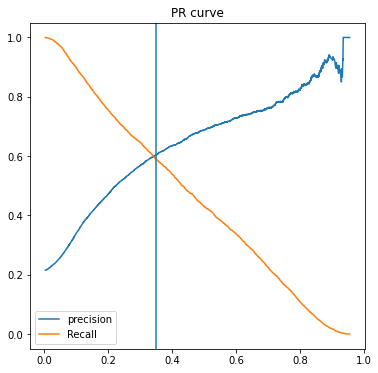

In [53]:
plt.figure(figsize=(6,6))
plt.title("PR curve")
sns.lineplot(x=th,y=p[:-1],label="precision")
sns.lineplot(x=th,y=r[:-1],label="Recall")
plt.axvline(0.35)